In [2]:
from utils import (adstock,decomposition,create_transformed_tables, calc_roi)
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
# Display the full statsmodels summary output as preformatted text to avoid truncation in Jupyter
from IPython.display import display, Markdown

In [ ]:
# Load data from the 'dataset' sheet, range B6:CY266, with 'Date' as the date column
df_data = pd.read_excel(
    'data/mock model.xlsx',
    sheet_name='DataSet',
    usecols='B:DA',
    skiprows=5,
    nrows=261,
    parse_dates=['Date']
).set_index('Date')

# Add a random number column
df_data['random'] = np.random.rand(len(df_data))


df_var_spec_all = pd.read_excel(
    'data/mock model.xlsx',
    sheet_name='EqnSpec',
    usecols='A:G',
) #.set_index('variable')

### Create Log-Linear Model


In [ ]:
df_var_spec = df_var_spec_all.copy()
df_var_spec = df_var_spec.rename(columns={'beta_log': 'beta'})
df_var_spec = df_var_spec[df_var_spec['beta'].notnull()].copy()
df_var_spec = df_var_spec.drop(columns=['beta_add'])
df_var_spec['log'] = df_var_spec['log'] == 1
df_var_spec


,variable,beta,carryover,log,group,decomp_ref,spend_variable
0,c,1.200000e+01,NaN,False,base,NaN,NaN
2,d_jan,-1.500000e-01,NaN,False,base,NaN,NaN
3,d_feb,-1.000000e-01,NaN,False,base,NaN,NaN
4,d_mar,8.000000e-02,NaN,False,base,NaN,NaN
5,d_apr,1.000000e-01,NaN,False,base,NaN,NaN
6,d_may,1.000000e-01,NaN,False,base,NaN,NaN
10,d_sep,5.000000e-02,NaN,False,base,NaN,NaN
11,d_oct,1.000000e-01,NaN,False,base,NaN,NaN
12,d_nov,1.500000e-01,NaN,False,base,NaN,NaN
13,d_dec,-2.000000e-01,NaN,False,base,NaN,NaN


In [61]:
sigma = 0.05
df_data['error'] = scipy.stats.norm.ppf(df_data['random'], loc=0, scale=sigma)

In [62]:
df_trans, df_values = create_transformed_tables(df_data, df_var_spec,True)

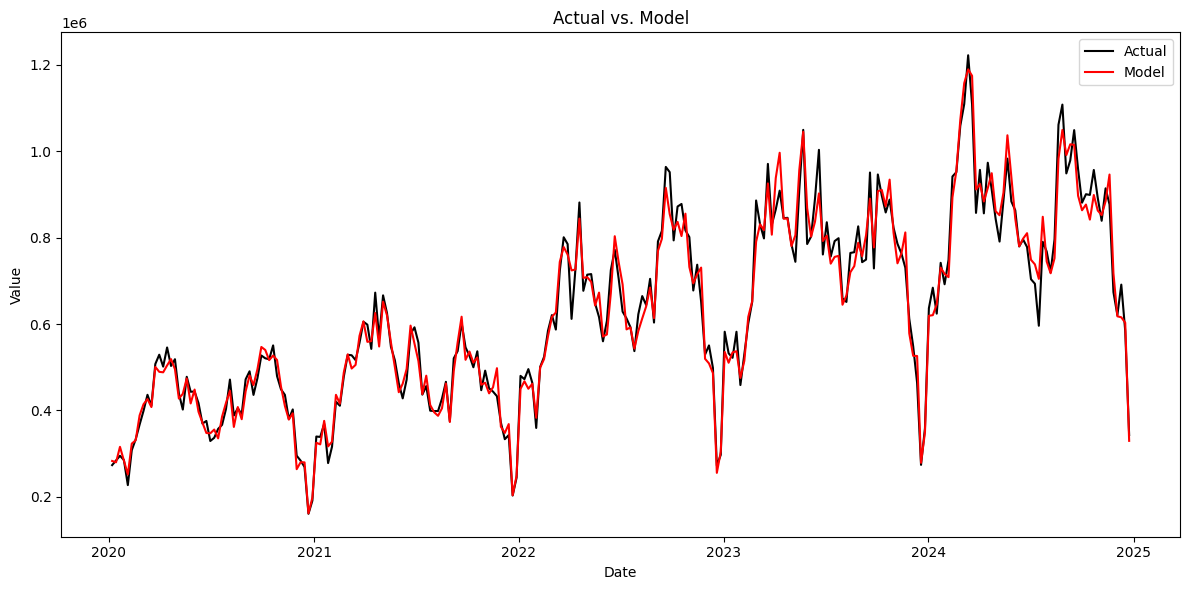

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_values.index, df_values['actual'], label='Actual', color='black')
plt.plot(df_values.index, df_values['model'], label='Model', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs. Model')
plt.legend()
plt.tight_layout()
plt.show()

In [64]:
df_decomp_vol = decomposition(df_var_spec,df_values)
price_col = 'price_se_xf'
df_decomp_val = df_decomp_vol.multiply(df_data[price_col], axis=0)

Check passed: True
Group sum check passed: True
Check passed: True


In [65]:
df_rois = calc_roi(df_decomp_val, df_var_spec, df_data)

In [67]:
# Interactive stacked area chart of all variables in df_decomp_vol except model, model_og, diff using plotly
import plotly.graph_objects as go
exclude_cols = ['model', 'model_og', 'diff']
area_cols = [col for col in df_decomp_vol.columns if col not in exclude_cols]
fig = go.Figure()
for col in area_cols:
    fig.add_trace(go.Scatter(x=df_decomp_vol.index, y=df_decomp_vol[col], mode='lines', stackgroup='one', name=col))
fig.update_layout(title='Stacked Area Chart of Variable Contributions (Interactive)',
                  xaxis_title='Date', yaxis_title='Contribution',
                  legend_title='Variable',
                  hovermode='x unified',
                  height=600, width=1000)
fig.show()

In [68]:
regression_vars = list(df_trans.columns)

import statsmodels.api as sm
X = df_trans[regression_vars].fillna(0)
y = np.log(df_values['actual'])
model = sm.OLS(y, X).fit()

summary_text = model.summary().as_text()
display(Markdown(f'```{summary_text}```'))

```                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 actual   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     375.1
Date:                Tue, 05 Aug 2025   Prob (F-statistic):          5.77e-179
Time:                        16:22:43   Log-Likelihood:                 412.15
No. Observations:                 260   AIC:                            -754.3
Df Residuals:                     225   BIC:                            -629.7
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
c                      11.7690      1.207      9.754      0.000       9.391      14.147
d_jan                  -0.1348      0.016     -8.238      0.000      -0.167      -0.103
d_feb                  -0.1240      0.017     -7.481      0.000      -0.157      -0.091
d_mar                   0.0666      0.016      4.074      0.000       0.034       0.099
d_apr                   0.0978      0.020      4.950      0.000       0.059       0.137
d_may                   0.0859      0.016      5.393      0.000       0.055       0.117
d_sep                   0.0499      0.016      3.097      0.002       0.018       0.082
d_oct                   0.1226      0.020      6.260      0.000       0.084       0.161
d_nov                   0.1445      0.016      9.229      0.000       0.114       0.175
d_dec                  -0.1835      0.018    -10.241      0.000      -0.219      -0.148
school_easter          -0.0720      0.032     -2.217      0.028      -0.136      -0.008
school_ht_feb          -0.0526      0.040     -1.313      0.190      -0.131       0.026
school_ht_may          -0.0875      0.036     -2.416      0.016      -0.159      -0.016
school_ht_oct          -0.0821      0.040     -2.034      0.043      -0.162      -0.003
payday_25               0.0739      0.009      8.628      0.000       0.057       0.091
bh_ny                  -0.5292      0.029    -18.214      0.000      -0.586      -0.472
bh_xmas                -0.6922      0.029    -23.531      0.000      -0.750      -0.634
day_valentine           0.2568      0.009     29.754      0.000       0.240       0.274
ww_nat_dlta_maxtemp     0.0111      0.002      5.576      0.000       0.007       0.015
ww_nat_dlta_rain       -0.0171      0.003     -5.969      0.000      -0.023      -0.011
ww_nat_dlta_sun         0.0091      0.003      2.675      0.008       0.002       0.016
rsi_nfood_vol_sa        1.1484      0.263      4.359      0.000       0.629       1.668
dist_xf                 1.1242      0.225      4.992      0.000       0.680       1.568
price_se_xf            -1.9911      0.163    -12.193      0.000      -2.313      -1.669
prom_tft                0.1568      0.010     15.710      0.000       0.137       0.176
pos_fsdu                0.1078      0.012      8.876      0.000       0.084       0.132
m_wow_tv              1.88e-07   5.74e-08      3.274      0.001    7.48e-08    3.01e-07
m_wow_olv            1.059e-07   2.15e-07      0.492      0.623   -3.18e-07     5.3e-07
m_wow_social        -8.503e-07   6.92e-07     -1.229      0.220   -2.21e-06    5.13e-07
m_amaze_tot          8.693e-08   1.81e-08      4.796      0.000    5.12e-08    1.23e-07
m_celeb_tv           4.607e-08   5.96e-08      0.773      0.440   -7.14e-08    1.64e-07
m_celeb_outdoor     -3.138e-09   8.15e-08     -0.039      0.969   -1.64e-07    1.57e-07
m_celeb_display      4.779e-07   3.33e-07      1.437      0.152   -1.77e-07    1.13e-06
comp_lor_tot          9.71e-10   2.35e-08      0.041      0.967   -4.54e-08    4.74e-08
comp_no7_tot        -4.119e-08   2.48e-08     -1.661      0.098   -9.01e-08    7.68e-09
==============================================================================
Omnibus:                       10.692   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.927
Skew:                          -0.449   Prob(JB):                      0.00424
Kurtosis:                       3.450   Cond. No.                     1.48e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+08. This might indicate that there are
strong multicollinearity or other numerical problems.```

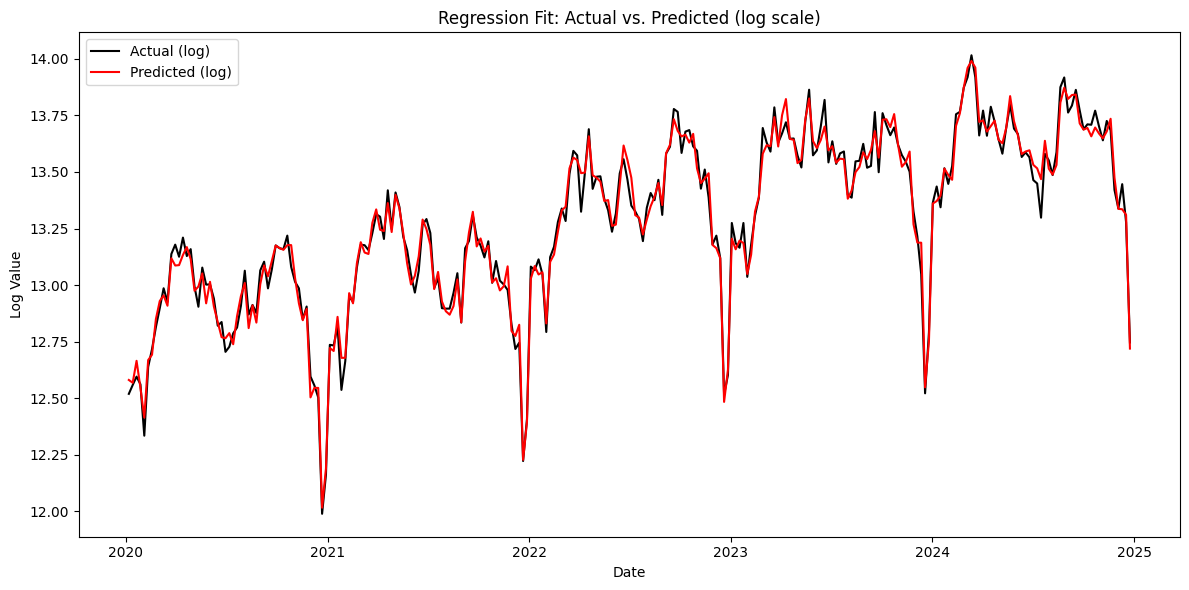

In [69]:
# Chart the fit of the regression: actual vs. predicted
y_pred = model.predict(sm.add_constant(df_trans[regression_vars].fillna(0)))
plt.figure(figsize=(12, 6))
plt.plot(df_values.index, y, label='Actual (log)', color='black')
plt.plot(df_values.index, y_pred, label='Predicted (log)', color='red', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Log Value')
plt.title('Regression Fit: Actual vs. Predicted (log scale)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# coefs = pd.Series(model.params, index=model.params.index)
df_var_spec_est = df_var_spec.copy()
df_var_spec_est['beta'] = df_var_spec_est['variable'].map(model.params)


In [ ]:
df_trans_est, df_values_est = create_transformed_tables(df_data, df_var_spec_est, True)

df_decomp_vol_est = decomposition(df_var_spec_est,df_values_est)
df_decomp_val_est = df_decomp_vol_est.multiply(df_data[price_col], axis=0)
df_rois_est = calc_roi(df_decomp_val_est, df_var_spec_est, df_data)

Check passed: True
Group sum check passed: True
Check passed: True


In [ ]:
# Append roi from df_rois2 to df_rois as a new column 'roi (est)', matching on variable
df_rois_merged = df_rois.copy()
if 'roi' in df_rois_est.columns:
    df_rois_merged = df_rois_merged.merge(df_rois_est[['variable', 'roi']], on='variable', how='left', suffixes=('', '_est'))
    df_rois_merged = df_rois_merged.rename(columns={'roi_est': 'roi (est)'})
else:
    print('roi column not found in df_rois2')
df_rois_merged

# Add a % change (est/actual) column to df_rois_merged, formatted to 2 decimal places
df_rois_merged = df_rois_merged.copy()
def pct_change(row):
    try:
        actual = float(row['roi'].replace(',', '')) if isinstance(row['roi'], str) else float(row['roi'])
        est = float(row['roi (est)'].replace(',', '')) if isinstance(row['roi (est)'], str) else float(row['roi (est)'])
        if pd.notnull(actual) and pd.notnull(est) and actual != 0:
            return f"{100 * (est - actual) / actual:.2f}%"
        else:
            return ''
    except Exception:
        return ''
df_rois_merged['% change (est/actual)'] = df_rois_merged.apply(pct_change, axis=1)
df_rois_merged

,variable,value,spend_sum,roi,roi (est),% change (est/actual)
0,m_Wow_TV,"4,471,876","2,699,491",1.66,1.57,-5.42%
1,m_Wow_OLV,"1,923,657","947,317",2.03,2.47,21.67%
2,m_Wow_Social,"497,480","121,919",4.08,4.42,8.33%
3,m_Amaze_Tot,"10,117,907","7,929,905",1.28,1.29,0.78%
4,m_Celeb_TV,"8,590,703","2,828,021",3.04,2.54,-16.45%
5,m_Celeb_Outdoor,"3,712,733","1,290,619",2.88,2.34,-18.75%
6,m_Celeb_Display,"3,941,598","1,586,718",2.48,2.91,17.34%
7,Total,"33,255,954","17,403,991",1.91,1.85,-3.14%


In [ ]:
# Save key DataFrames as CSVs in the results folder
import os
results_dir = 'results'
os.makedirs(results_dir, exist_ok=True)

df_data.to_csv(os.path.join(results_dir, 'data.csv'))
df_var_spec.to_csv(os.path.join(results_dir, 'var_spec.csv'), index=False)
df_var_spec_est.to_csv(os.path.join(results_dir, 'var_spec_est.csv'), index=False)
df_decomp_vol.to_csv(os.path.join(results_dir, 'decomp.csv'))
df_decomp_vol_est.to_csv(os.path.join(results_dir, 'decomp_est.csv'))
df_rois_merged.to_csv(os.path.join(results_dir, 'Rois.csv'), index=False)